# Generalized Linear Models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Beyond Linear Regression

Linear regressions have [limitations](https://en.wikipedia.org/wiki/Generalized_linear_model).

As it stands, the algorithm could generate a prediction *anywhere on the real number line*. This *may* be realistic, like if I'm predicting national surpluses/debts.

But what if I'm predicting values of a variable that doesn't take, say, negative values, like temperature in Kelvin?

What if I'm predicting values of a variable that takes only integer values, like the number of mouseclicks on my killer ds blog per minute?

What if I'm predicting probabilities? Or something Boolean / Bernoullian?

What if the shape of my errors changes as a function of the dependent variable?

Am I stuck using linear regression? There's got to be a better way!

The strategy now is to *generalize* the notion of linear regression; linear regression as we've known it will become a special case. In particular, we'll keep the idea of the regression best-fit line, but now **we'll allow the model to make predictions through some (non-trivial) transformation of the linear predictor**.

Let's say we've constructed our best-fit line, i.e. our linear predictor, $\hat{L} = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$.

## Logistic Regression

Consider the following transformation: <br/>
$\large\hat{y} = \Large\frac{1}{1 + e^{-\hat{L}}} \large= \Large\frac{1}{1 + e^{-(\beta_0 + ... + \beta_nx_n)}}$. This is called the **sigmoid function**.

We're imagining that $\hat{L}$ can take any values between $-\infty$ and $\infty$.

$\large\rightarrow$ But what values can $\hat{y}$ take? What does this function even look like?

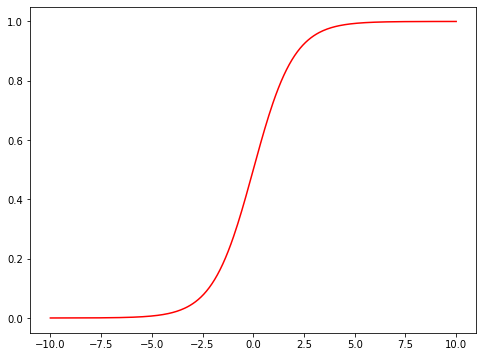

In [2]:
# Let's plot this function here:

X = np.linspace(-10, 10, 300)
Y = 1 / (1 + np.exp(-X))

plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'r');

### Interpretation

This function squeezes our predictions between 0 and 1. And that's why it's so useful for **binary classification problems**.

Suppose I'm building a model to predict whether a plant is poisonous or not, based perhaps on certain biological features of its leaves. I'll let '1' indicate a poisonous plant and '0' indicate a non-poisonous plant.

Now I'm forcing my predictions to be between 0 and 1, so suppose for test plant $P$ I get some value like 0.19.

I can naturally understand this as **the probability that $P$ is poisonous**.

If I truly want a binary prediction, I can simply round my score appropriately.

How do we fit a line to our dependent variable if its values are already stored as probabilities? We can use the inverse of the sigmoid function, and just set our regression equation equal to that. The inverse of the sigmoid function is called the **logit function**, and it looks like this:

$\large f(y) = \ln\left(\frac{y}{1 - y}\right)$. Notice that the domain of this function is $(0, 1)$.

$\hspace{110mm}$(Quick proof that logit and sigmoid are inverse functions:

$\hspace{170mm}x = \frac{1}{1 + e^{-y}}$; <br/>
$\hspace{170mm}$so $1 + e^{-y} = \frac{1}{x}$; <br/>
$\hspace{170mm}$so $e^{-y} = \frac{1 - x}{x}$; <br/>
$\hspace{170mm}$so $-y = \ln\left(\frac{1 - x}{x}\right)$; <br/>
$\hspace{170mm}$so $y = \ln\left(\frac{x}{1 - x}\right)$.)

Our regression equation will now look like this:

$\large\ln\left(\frac{y}{1 - y}\right) = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$.

This equation is used for a **logistic regression**. Note that it is now not the target variable itself that is modeled as varying linearly with the predictor(s) but rather the values of this logit function of the target that are so represented. This is the sense in which we have a more generalized notion of a linear model.

This function whose values are modeled as varying linearly is in general called the **link function**. Logistic regression's link function is the logit function, but different sorts of models use different link functions. We'll look at another example below.

[Wikipedia](https://en.wikipedia.org/wiki/Generalized_linear_model#Link_function) has a nice table of generalized linear model types and their associated link functions.

### Odds

There are other ways to squeeze the results of a linear regression into the set (0, 1).

But the ratio $\frac{p}{1-p}$ represents the *odds* of some event, where $p$ is the probability of the event. And so *this* logit function represents the **log-odds** of success (y=1).

### Cost Functions and Solutions to the Optimization Problem

No one has yet found a closed-form solution to the optimization problem presented by logistic regression. But even if one exists, the computation would no doubt be so complex that we'd be better off using some sort of approximation method instead.

Various versions of gradient descent or coordinate descent (this is like gradient descent but it focuses only on one parameter at a time) have been used. The scikit-learn class expects the user to specify the solver to be used in calculating the coefficients.

Question: What are we using this approximation method *on*? With linear regression we could sensibly calculate a residual sum of squares, but that doesn't seem to apply any more.

Roughly, we want to measure how far off our predictions are. (That part is still the same.) But now we'll be comparing our predictions to 0's and 1's. Predictions near 0 for actual negatives and near 1 for actual positives should count far less to our loss function than predictions near 1 for actual negatives and near 0 for actual positives. See [here](https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11) for more details.

### Logistic Regression in Sci-Kit Learn

In [3]:
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('heart.csv')

X = data.drop('target', axis=1)
y = data['target']

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Let's split our data into train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Scaling our data with logistic regression is helpful for interpretability, since it makes the "average" record the baseline. Moreover, scaling is always important for models that include regularization, and scikit-Learn's `LogisticRegression()` objects have regularization by default. So: let's scale!

In [5]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [6]:
# Instantiate a logistic regression object with the 'liblinear' solver,
# which is good for small datasets.

logreg = LogisticRegression(solver='liblinear', multi_class='auto')

# Now fit it to the training data.

logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Coefficients

In [7]:
logreg.coef_

array([[-0.02577574, -0.68517618,  0.88034432, -0.2191191 , -0.12061239,
         0.03117341,  0.38990678,  0.36142348, -0.51937424, -0.66855458,
         0.43722135, -0.83407399, -0.6065365 ]])

In [8]:
logreg.intercept_

array([0.15428392])

How do we interpret these coefficients? For a linear regression, the situaton was like this:

- Linear Regression: We construct the best-fit line and get a set of coefficients. Suppose $\beta_1 = k$. In that case we would expect a 1-unit change in $x_1$ to produce a $k$-unit change in $y$.

- Logistic Regression: We find the coefficients of the best-fit line by some approximation method. Suppose $\beta_1 = k$. In that case we would expect a 1-unit change in $x_1$ to produce a $k$-unit change (not in $y$ but) in $ln\left(\frac{y}{1-y}\right)$.

We have:

$\huge\ln\left(\frac{y(x_1+1, ... , x_n)}{1-y(x_1+1, ... , x_n)}\right) = \ln\left(\frac{y(x_1, ... , x_n)}{1-y(x_1, ... , x_n)}\right) + k$.

Exponentiating both sides:

$\huge\frac{y(x_1+1, ... , x_n)}{1-y(x_1+1, ... , x_n)} = e^{\ln\left(\frac{y(x_1, ... , x_n)}{1-y(x_1, ... , x_n)}\right) + k}$ <br/><br/> $\huge\frac{y(x_1+1, ... , x_n)}{1-y(x_1+1, ... , x_n)}= e^{\ln\left(\frac{y(x_1, ... , x_n)}{1-y(x_1, ... , x_n)}\right)}\cdot e^k$ <br/><br/> $\huge\frac{y(x_1+1, ... , x_n)}{1-y(x_1+1, ... , x_n)}= e^k\cdot\frac{y(x_1, ... , x_n)}{1-y(x_1, ... , x_n)}$

That is, the odds ratio at $x_1+1$ has increased by a factor of $e^k$ relative to the odds ratio at $x_1$.

For more on interpretation, see [this page](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/binary-logistic-regression/interpret-the-results/all-statistics-and-graphs/coefficients/).

#### `.predict()` and `.predict_proba_()`

In [9]:
X_test_scaled[0]

array([ 0.26745345,  0.71647284, -0.97937092,  1.16826465,  0.55847168,
       -0.382707  , -1.04486089, -1.67196572,  1.46723474, -0.38759507,
       -0.6634347 ,  0.30327986, -2.20282109])

In [10]:
first_test_row = X_test_scaled[0].reshape(1, -1)
logreg.predict(first_test_row)

array([0])

In [12]:
logreg.predict_proba(first_test_row)

array([[0.9057248, 0.0942752]])

We should be able to reproduce the prediction if we plug our betas into the sigmoid function!

In [13]:
line_value = logreg.coef_.dot(first_test_row.reshape(-1, 1)) + logreg.intercept_

1 / (1 + np.exp(-line_value))

array([[0.0942752]])

## Appendix: Poisson Regression

Let's get a taste of a different sort of generalized linear model. Here's a new regression equation:

$\large\ln(y) = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$. The link function is simply $\ln(y)$ and so we have:

$\large\hat{y} = e^\hat{L} = e^{\beta_0 + ... + \beta_nx_n}$.

The domain, or "support", for a Poisson distribution is {0, 1, 2, ... }. Can you see why?

### Poisson Regression in Statsmodels

In [14]:
awards = pd.read_csv('https://stats.idre.ucla.edu/stat/data/poisson_sim.csv')

awards.head()

,id,num_awards,prog,math
0,45,0,3,41
1,108,0,1,41
2,15,0,3,44
3,67,0,3,42
4,153,0,3,40


What is this dataset about?

The data show the number of awards earned by students at one high school. 'Prog' is a coded version of the sort of program in which the student was enrolled and 'math' is a score on a math exam.

Let's one-hot encode it:

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto')

ohe_new = ohe.fit_transform(awards['prog'].values.reshape(-1, 1))

In [16]:
awards_dums = pd.concat([awards, pd.DataFrame(ohe_new.todense())], axis=1)

awards_dums.head()

,id,num_awards,prog,math,0,1,2
0,45,0,3,41,0.0,0.0,1.0
1,108,0,1,41,1.0,0.0,0.0
2,15,0,3,44,0.0,0.0,1.0
3,67,0,3,42,0.0,0.0,1.0
4,153,0,3,40,0.0,0.0,1.0


In [17]:
# Get a statsmodels summary here!

X = sm.add_constant(awards_dums[['math', 0, 1, 2]])
y = awards_dums['num_awards']

poi_model = sm.GLM(y, X, sm.families.Poisson())
poi_model.fit().summary()

/Users/sam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.75
Date:                Thu, 12 Mar 2020   Deviance:                       189.45
Time:                        11:14:54   Pearson chi2:                     212.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5719      0.459     -7.774      0.000      -4.472      -2.671
math           0.0702      0.011      6.619      0.000       0.049       0.091
0             -1.6752      0.289     -5.804      0.000      -2.241      -1.109
1             -0.5913      0.248     -2.380      0.017      -1.078      -0.104
2             -1.3054      0.259     -5.040      0.000      -1.813      -0.798
==============================================================================
"""

In [18]:
# Interpreting the results

np.exp(0.0702)

1.072722704342061